---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [ ]:
import pandas as pd

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
data = pd.read_csv("./DATA_SET/AB_NYC_2019.csv")
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
data.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [4]:
print('필드명 : ', data.columns.values)
print('필드개수 : ', len(data.count()))
print('데이터 수 : ', len(data.index))

필드명 :  ['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price' 'minimum_nights'
 'number_of_reviews' 'last_review' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']
필드개수 :  16
데이터 수 :  48895


### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [5]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [6]:
data = data[pd.notnull(data['name'])]
data = data[pd.notnull(data['host_name'])]

In [7]:
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [8]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import matplotlib.pyplot as plt
import numpy as np
visual_data = data

# 3번 문제
# newyorkcity = plt.imread('newyorkcity.png')
# plt.figure(figsize=(10,8))
# plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
# ax = plt.gca()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

In [9]:
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (10, 8)

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
data.describe([.05, .25, .5, .75, .95])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.00,48858.00,48858.00,48858.00,48858.00,48858.00,48858.00,38821.00,48858.00,48858.00
mean,19023349.93,67631688.29,40.73,-73.95,152.74,7.01,23.27,1.37,7.15,112.80
std,10982893.61,78623888.99,0.05,0.05,240.23,20.02,44.55,1.68,32.96,131.61
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
5%,1221895.25,815591.55,40.65,-74.00,40.00,1.00,0.00,0.04,1.00,0.00
25%,9475979.75,7818668.75,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19691143.50,30791331.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29157648.25,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
95%,35259686.30,241785190.00,40.83,-73.87,355.00,30.00,114.00,4.64,15.00,359.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다. 

In [12]:
data = data[data['price'] <= data['price'].quantile(.95)]

In [13]:
data.sort_values('price', ascending=True).tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1494,672724,Elegant 2 BDRM Brooklyn Brownstone,3411621,Elizabeth,Brooklyn,Fort Greene,40.68,-73.97,Entire home/apt,355,5,19,2018-11-02,0.24,1,301
35996,28606376,Bedroom Apartment in the Heart of Manhattan,215897007,Joana,Manhattan,Murray Hill,40.75,-73.98,Private room,355,2,13,2019-06-09,1.49,1,308


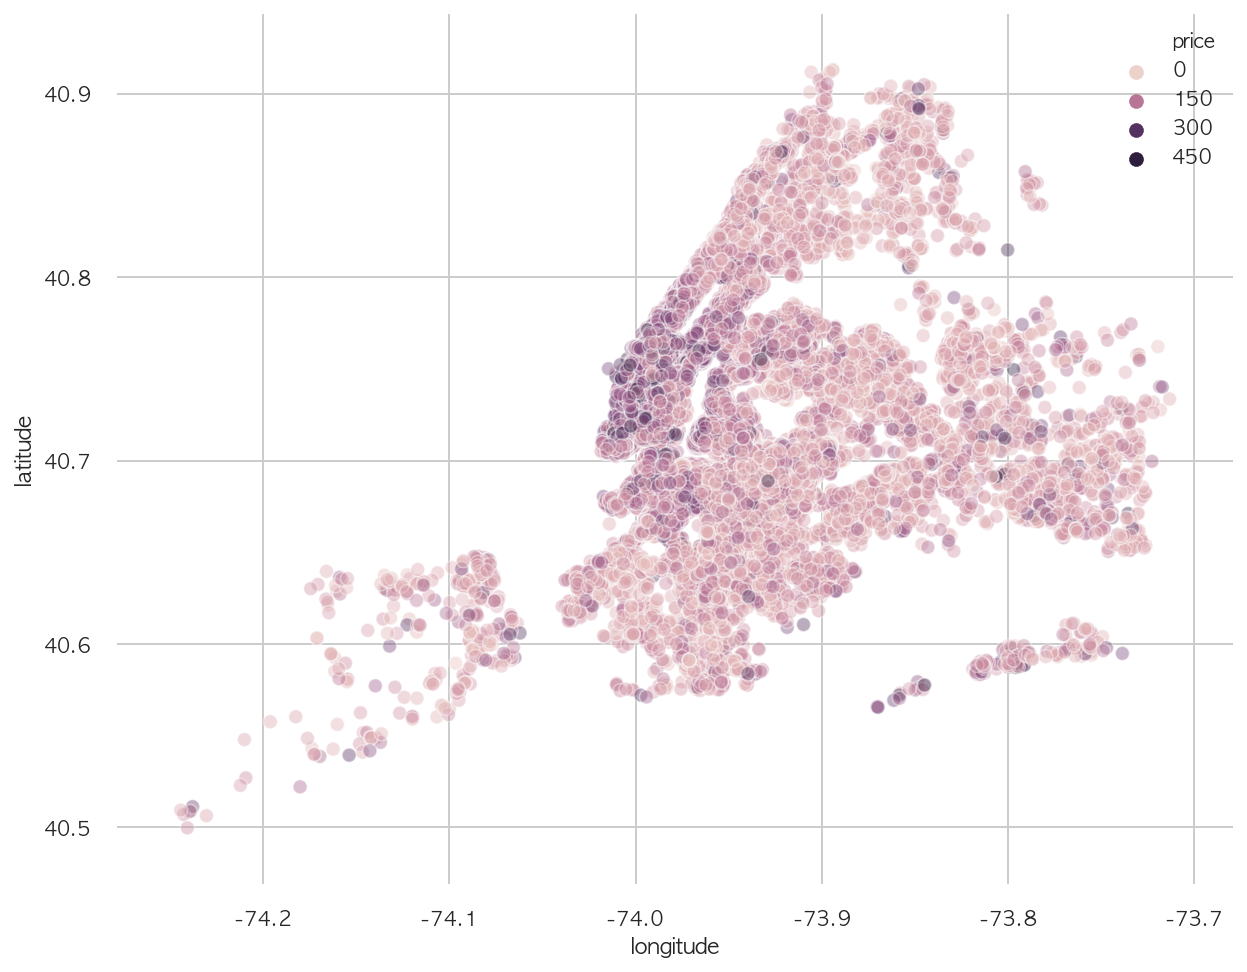

In [14]:
x = data['longitude']
y = data['latitude']
c = data['price']

plt.figure(figsize=(10, 8))
plt.get_cmap('jet')
points = sns.scatterplot(x, y, c, alpha=0.4, markers='o')

plt.show()

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

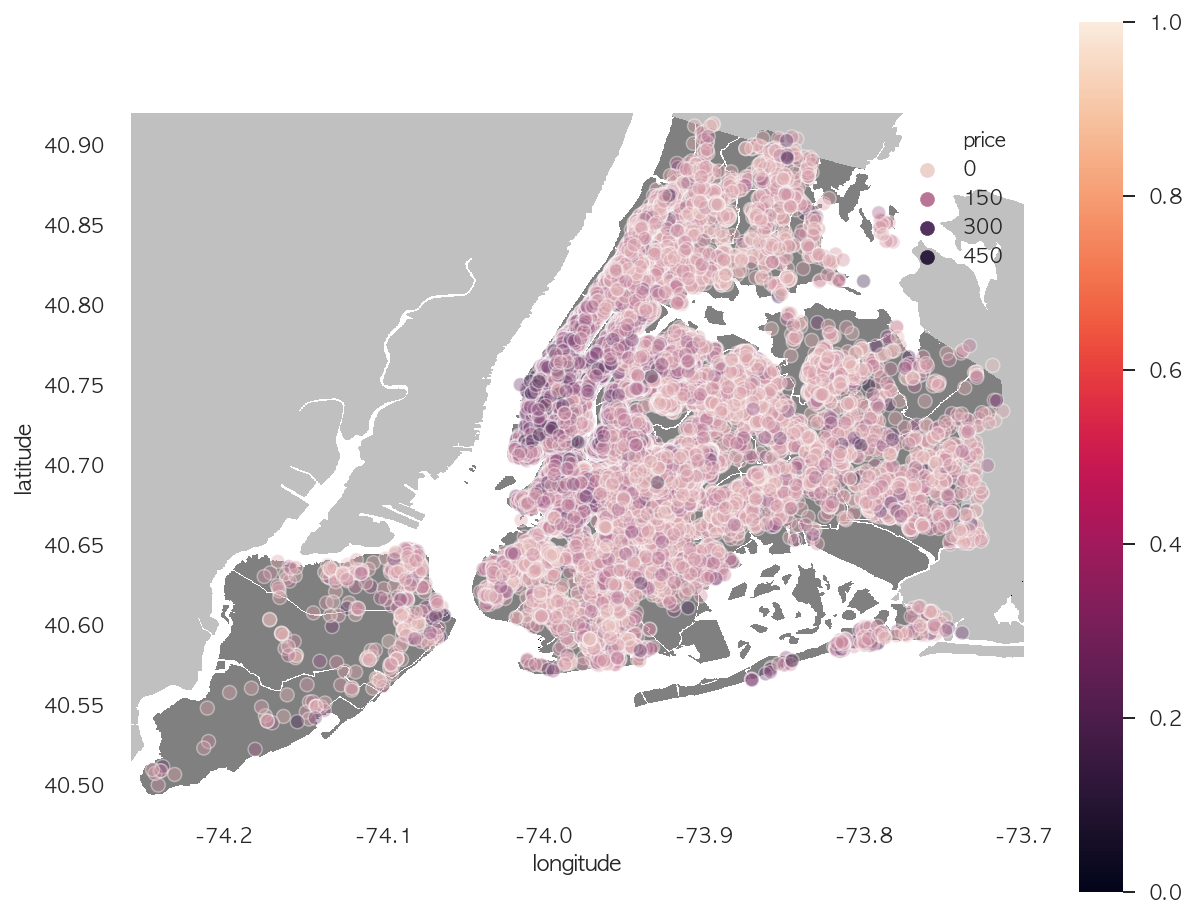

In [15]:
newyorkcity = plt.imread('./DATA_SET/newyorkcity.png')
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
sns.scatterplot(x, y, c, cmap=plt.get_cmap('jet'), alpha=0.4)
plt.colorbar()
plt.grid()

plt.show()

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [16]:
# data의 경우 데이터 전처리가 완료된 값을 사용해주세요.
import sqlite3
import re
analysis_data = data

# 4번 문제
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)
# 4번 예제
# pd.read_sql('select * from data', conn)

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8] re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터합니다. 

In [17]:
name = visual_data['name'][0]
p = re.compile(r'[^a-zA-Z0-9\.#\-, ]')
visual_data['name'] = visual_data['name'].apply(
    lambda name: re.sub(p, '', name).strip())

In [18]:
visual_data['name'].head()

0                 Clean  quiet apt home by the park
1                             Skylit Midtown Castle
2                 THE VILLAGE OF HARLEM....NEW YORK
3                   Cozy Entire Floor of Brownstone
4    Entire Apt Spacious StudioLoft by central park
Name: name, dtype: object

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [19]:
top_price = visual_data.groupby('room_type')['price', 'name', 'host_id']
room1 = top_price.get_group(
    'Entire home/apt').sort_values('price', ascending=False)[:2]
room2 = top_price.get_group('Private room').sort_values(
    'price', ascending=False)[:1]
room3 = top_price.get_group('Shared room').sort_values(
    'price', ascending=False)[:1]
rooms = pd.concat([room1, room2, room3])

In [20]:
pd.merge(visual_data.room_type, rooms, right_index=True,
         left_index=True).sort_values('room_type', ascending=True).reset_index()

,index,room_type,price,name,host_id
0,17692,Entire home/apt,10000,Luxury 1 bedroom apt. -stunning Manhattan views,5143901
1,29238,Entire home/apt,10000,1-BR Lincoln Center,72390391
2,9151,Private room,10000,Furnished room in Astoria apartment,20582832
3,14380,Shared room,1800,Mins away to Manhattan Suite Residence,24146326


### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

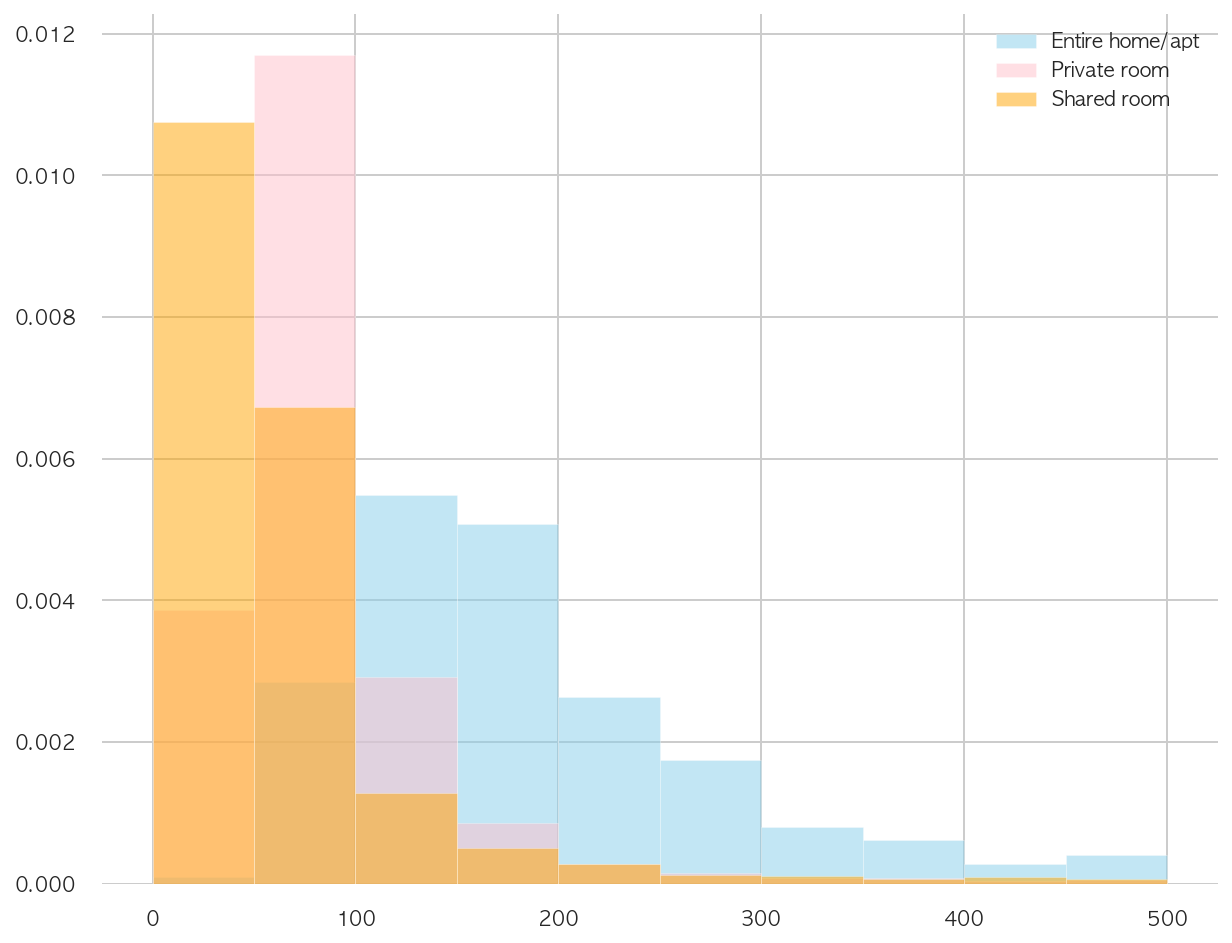

In [21]:
plt.hist(visual_data[visual_data.room_type == 'Entire home/apt']['price'], range=(
    0, 500), bins=10, color='skyblue', alpha=0.5, normed=True, label='Entire home/apt')
plt.hist(visual_data[visual_data.room_type == 'Private room']['price'], range=(
    0, 500), bins=10, color='pink', alpha=0.5, normed=True, label='Private room')
plt.hist(visual_data[visual_data.room_type == 'Shared room']['price'], range=(
    0, 500), bins=10, color='orange', alpha=0.5, normed=True, label='Shared room')
plt.legend()
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [22]:
conn = sqlite3.connect(':memory:')
conn.text_factory = str
analysis_data.to_sql(name='data', con=conn)

In [23]:
pd.read_sql(
   """ 
   SELECT host_id,count(host_id) as count, avg(price) as mean 
   FROM data 
   GROUP BY host_id
   ORDER BY count DESC
   LIMIT 10 """, conn)

,host_id,count,mean
0,219517861,272,206.49
1,107434423,195,285.56
2,137358866,103,43.83
3,30283594,98,223.67
4,12243051,95,211.31
5,61391963,91,146.24
6,16098958,91,196.81
7,22541573,87,215.44
8,7503643,52,149.19
9,1475015,52,103.08
